In [6]:
using Pkg, Revise
#Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot
import DataFrames

In [7]:
using Clapeyron

glycine_data = """Clapeyron Database File
My SolidHfus Parameters
species,Mw,Tm,Hfus
glycine,75.066
6,565,24100
"""

components = [("water", ["H2O"=>1]), ("glycine", ["COOH"=>1, "CH2NH2"=>1])]

model = CompositeModel(components;
                       fluid = BasicIdeal,
                       liquid = UNIFAC,
                       solid = SolidHfus,
                       solid_userlocations = glycine_data)

Composite Model with 2 components:
 "water"
 "glycine"
Solid Model: SolidHfus("water", "glycine")
Activity Model: UNIFAC
Fluid Model: BasicIdeal

In [8]:
T = 298.15
p = 1e5
z = [0., 1.]
s = sle_solubility(model,p,T,[1.,1.];solute=["glycine"])

2-element Vector{Float64}:
 0.9540923943770581
 0.04590760562294198

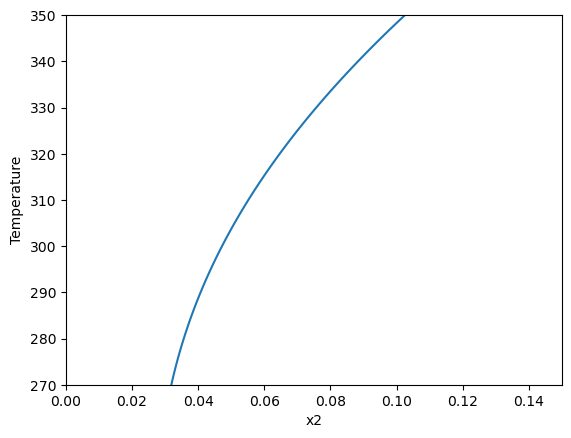

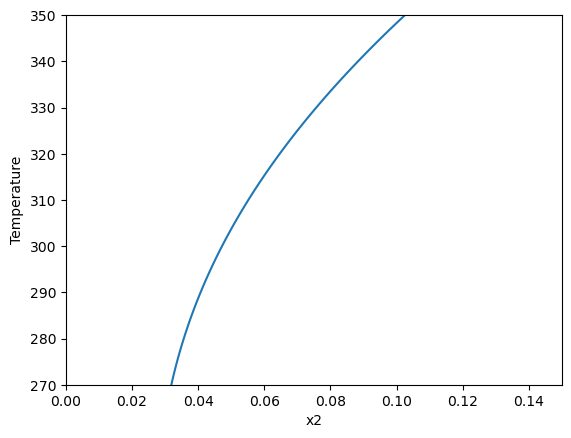

In [9]:
using Clapeyron

T = LinRange(270.,350.,81)
p = 100000 

s = zeros(length(T))

for i in 1:length(T)
    s[i] = sle_solubility(model,p,T[i],[1.,1.];solute=["glycine"])[2]
end

plt.clf()
plt.plot(s,T)
plt.xlabel("x2")
plt.ylabel("Temperature")
plt.xlim(0,0.15)
plt.ylim(270,350)
display(plt.gcf())

In [10]:
using DataFrames

df = DataFrame(
    Temperature_K = T,
    x_glycine = s)

println(df)

81×2 DataFrame
 Row │ Temperature_K  x_glycine 
     │ Float64        Float64   
─────┼──────────────────────────
   1 │         270.0  0.0318951
   2 │         271.0  0.0322121
   3 │         272.0  0.0325419
   4 │         273.0  0.0328846
   5 │         274.0  0.0332403
   6 │         275.0  0.0336089
   7 │         276.0  0.0339905
   8 │         277.0  0.0343852
   9 │         278.0  0.034793
  10 │         279.0  0.035214
  11 │         280.0  0.0356482
  12 │         281.0  0.0360956
  13 │         282.0  0.0365564
  14 │         283.0  0.0370307
  15 │         284.0  0.0375184
  16 │         285.0  0.0380196
  17 │         286.0  0.0385345
  18 │         287.0  0.0390631
  19 │         288.0  0.0396055
  20 │         289.0  0.0401617
  21 │         290.0  0.0407318
  22 │         291.0  0.0413159
  23 │         292.0  0.0419142
  24 │         293.0  0.0425266
  25 │         294.0  0.0431532
  26 │         295.0  0.0437942
  27 │         296.0  0.0444495
  28 │         297.0  0.